# EXPLORATION OF THE EEG DATASET

In [1]:
!pip install mat4py

You should consider upgrading via the 'C:\Users\CHAHAT KALSI\Desktop\adhd\venv\Scripts\python.exe -m pip install --upgrade pip' command.


## Setting the paths

In [1]:
import os

# raw data paths
raw_base = os.path.normpath("D:\Data Division\Raw Data")
eo_adhd = os.path.join(raw_base, 'Eyes-open', 'ADHD')
ec_adhd = os.path.join(raw_base, 'Eyes-closed', 'ADHD')
eo_cont = os.path.join(raw_base, 'Eyes-open', 'Control')
ec_cont = os.path.join(raw_base, 'Eyes-closed', 'Control')

# channel locations path
locs_path = os.path.normpath("D:\Data Division\Standard-10-20-Cap19.locs")

# processed data paths
proc_base = os.path.normpath("D:\MatLab\\toolbox\eeglab2021.0\eeglab2021.0\data_for_processing\EEG_DATA")
# ADJUST
adj_base = os.path.join(proc_base, "Adjust")
adj_eo_adhd = os.path.join(adj_base, 'ADHD_EO')
adj_ec_adhd = os.path.join(adj_base, 'ADHD_EC')
adj_eo_cont = os.path.join(adj_base, 'CONTROL_EO')
adj_ec_cont = os.path.join(adj_base, 'CONTROL_EC')

## Reading channel locations

In [2]:
channels = []
locs = open(locs_path)
for i in locs.read().split('\t'):
    if '\n' in i:
        channels.append(i.split('\n')[0].strip())
channels

['Fp1',
 'Fp2',
 'F7',
 'F3',
 'Fz',
 'F4',
 'F8',
 'T7',
 'C3',
 'Cz',
 'C4',
 'T8',
 'P7',
 'P3',
 'Pz',
 'P4',
 'P8',
 'O1',
 'O2']

## SUBJECT: 103 ADHD

In [3]:
from mat4py import loadmat, savemat

In [4]:
files = []
for d in os.listdir(ec_adhd):
    files.append(d)
files[0]

'A_103_EC.mat'

In [5]:
ec_adhd_103 = loadmat(os.path.join(ec_adhd, files[0]))

In [6]:
# data = dict
# key = 'EO_Data or EC_Data'
# value = 2d list, length = 256*60*3 = 46080
# each list has values for 19 channels

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain
%matplotlib inline

### Plotting all channels together on each other

Text(0, 0.5, 'Sensor Value (uV)')

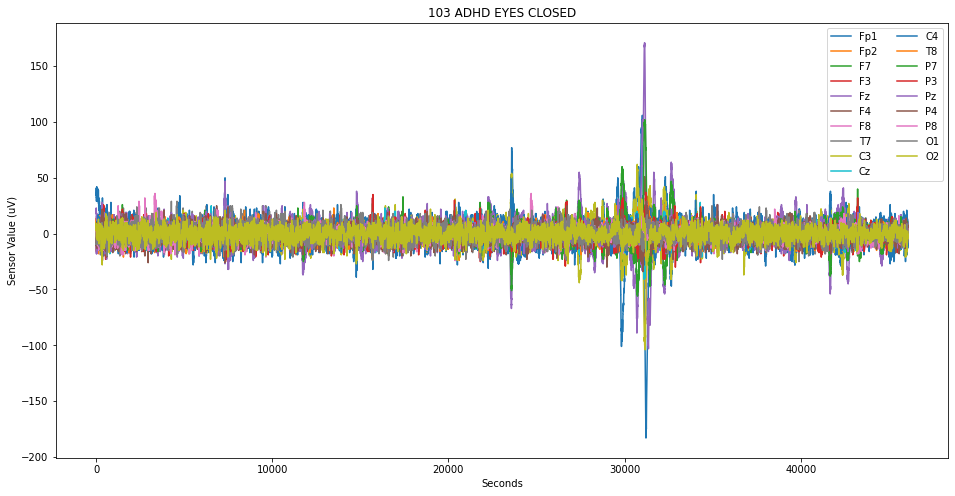

In [19]:
plt.figure(figsize=(16,8))
plt.plot(ec_adhd_103['EC_Data'])
plt.legend(channels, ncol=2, bbox_to_anchor=(1.0, 1.0))
plt.title('103 ADHD EYES CLOSED')
plt.xlabel('Seconds')
plt.ylabel('Sensor Value (uV)')

### Plotting all channels together but separately

<IPython.core.display.Javascript object>


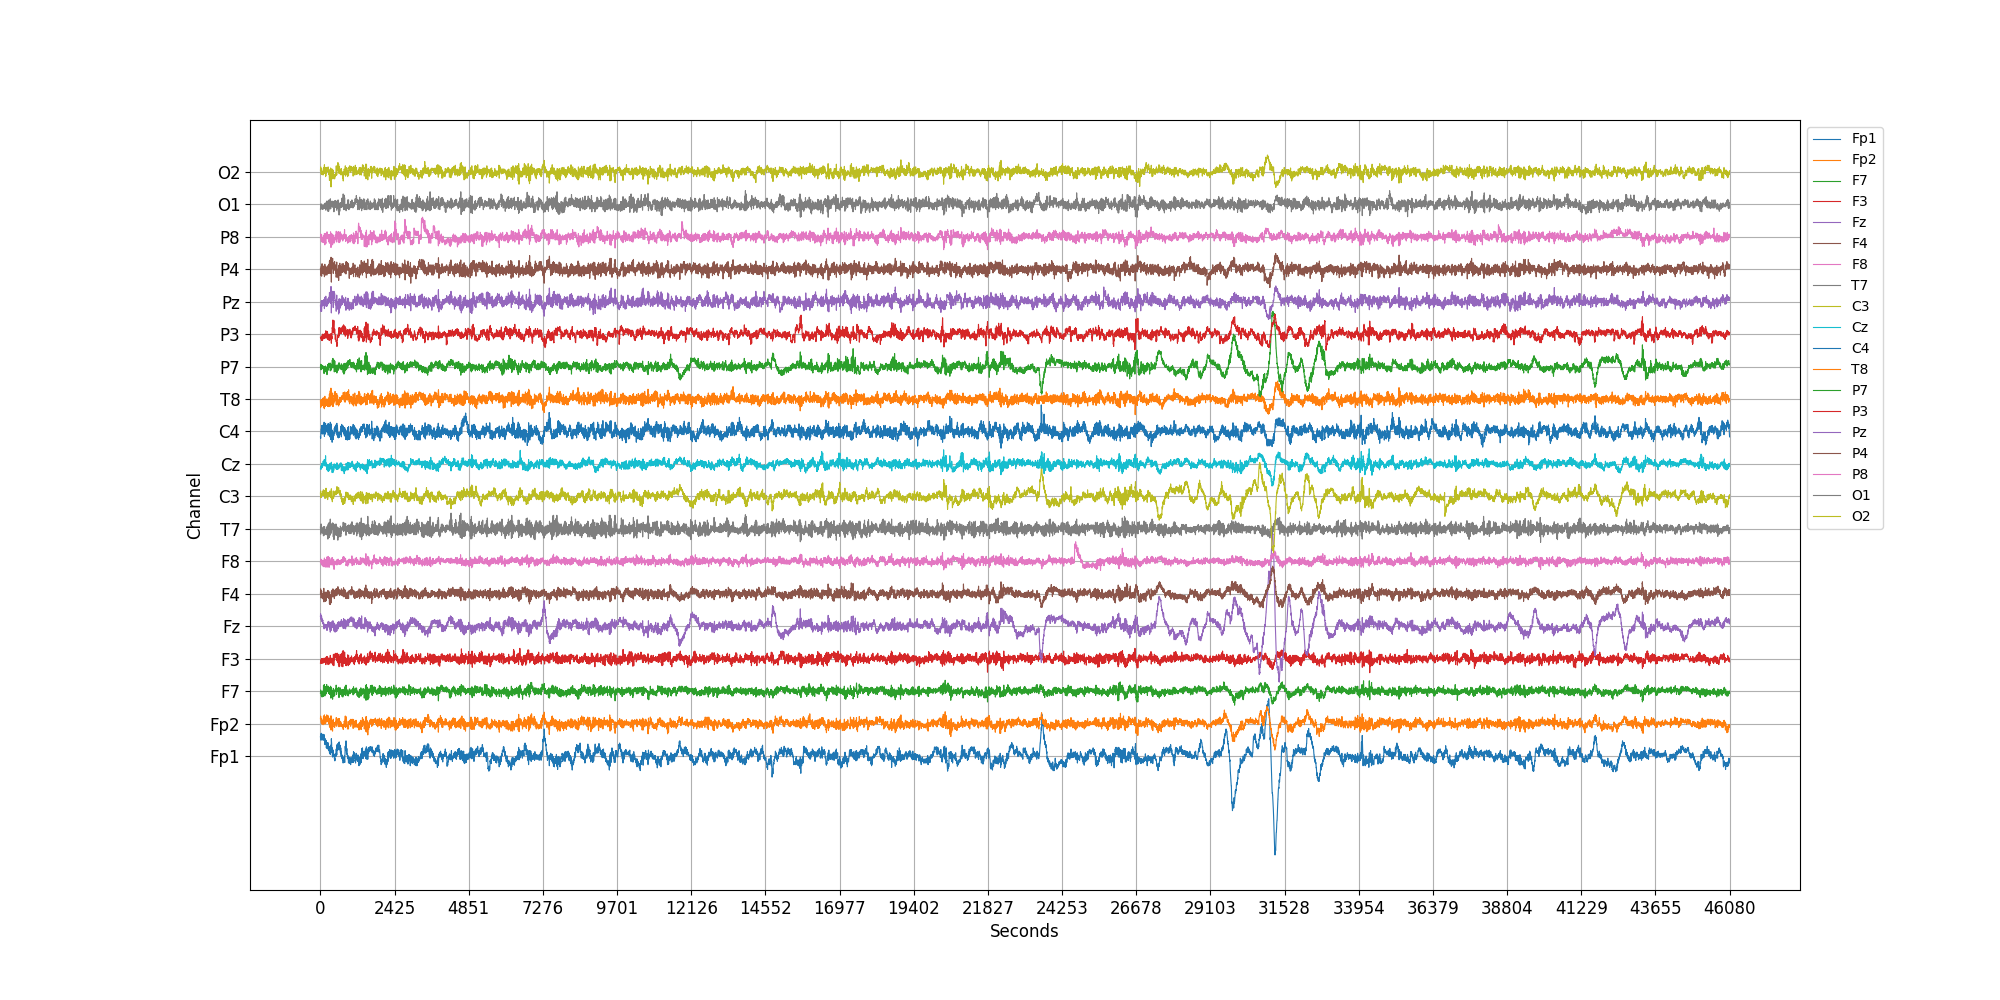

Text(0, 0.5, 'Channel')

In [11]:
plt.figure(figsize=(20,10), dpi=80)
x=0
for data in np.transpose(ec_adhd_103['EC_Data']):
    #plt.plot(list(chain(range(-1000, 0),range(len(data)))), [x]*(len(data)+1000), color='black', alpha=0.5)
    plt.plot(range(len(data)), [data[i]+x for i in range(len(data))], linewidth=0.8)
    x+=60
plt.yticks(np.linspace(0, 19*60, num=19, endpoint=False), channels, size='large')
plt.xticks(np.linspace(0, 256*180, num=20, endpoint=True), size='large')
plt.grid()
plt.legend(channels, ncol=1, bbox_to_anchor=(1.0, 1.0))
plt.xlabel('Seconds', size='large')
plt.ylabel('Channel', size='large')

### Plotting a single channel

Text(0, 0.5, 'Sensor Value (uV)')

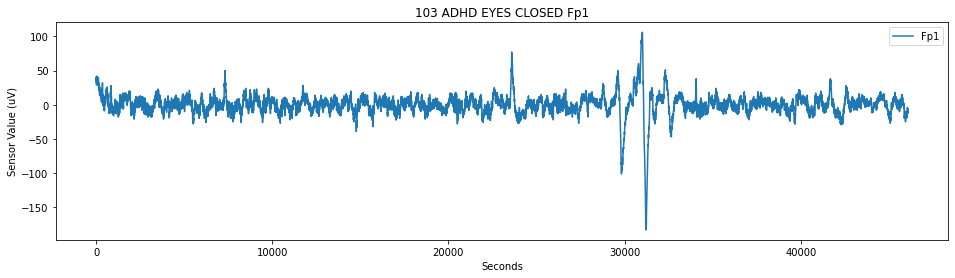

In [16]:
# taking transpose to plot values for each channel separately
plt.figure(figsize=(16,4))
plt.plot(np.transpose(ec_adhd_103['EC_Data'])[0])
plt.legend([channels[0]])
plt.title('103 ADHD EYES CLOSED '+ channels[0])
plt.xlabel('Seconds')
plt.ylabel('Sensor Value (uV)')

### Zooming into an interesting segment

Text(0, 0.5, 'Sensor Value (uV)')

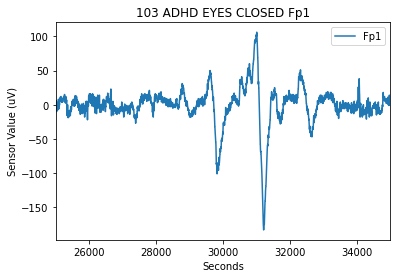

In [17]:
plt.plot(np.transpose(ec_adhd_103['EC_Data'])[0])
plt.legend([channels[0]])
plt.title('103 ADHD EYES CLOSED '+ channels[0])
plt.xlim(25000,35000)
plt.xlabel('Seconds')
plt.ylabel('Sensor Value (uV)')

### Plotting all channels separately

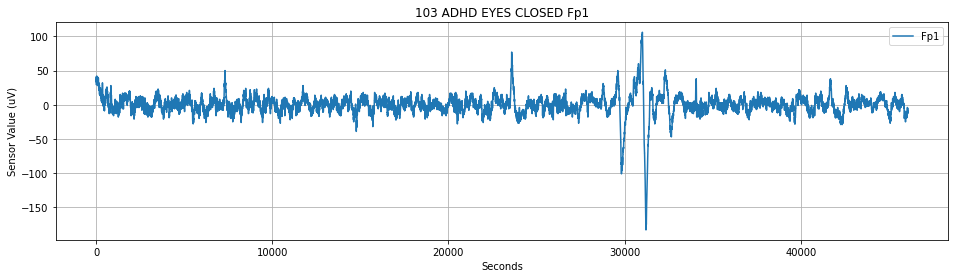

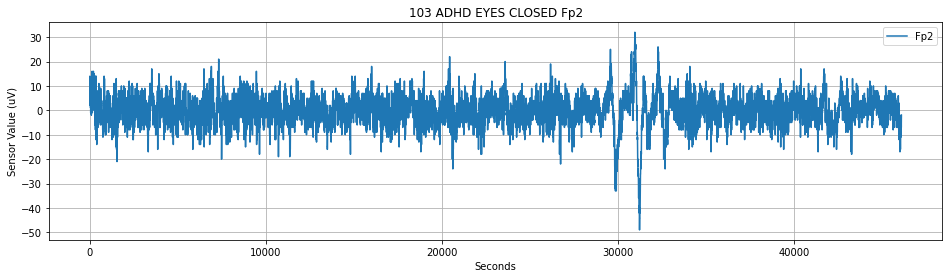

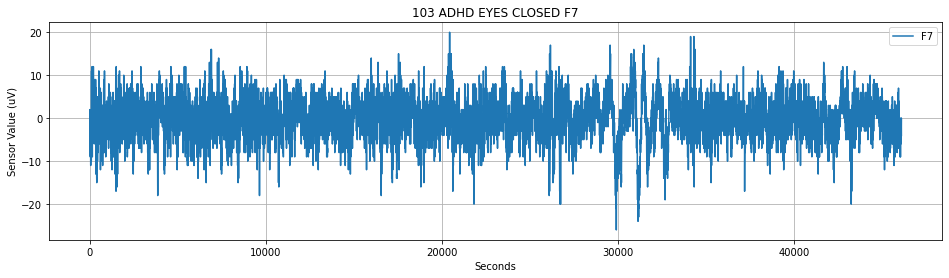

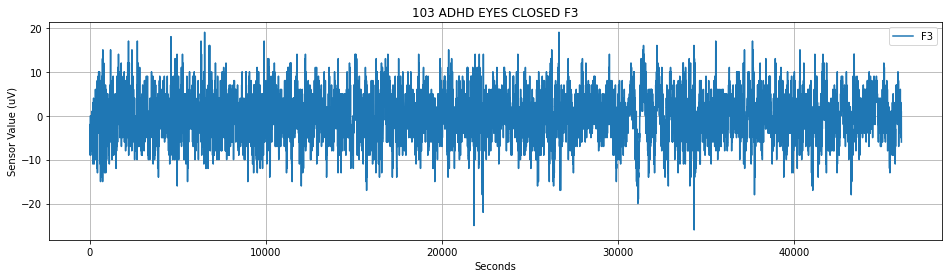

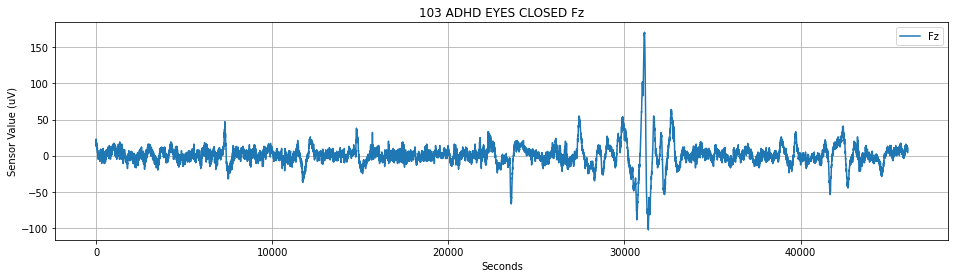

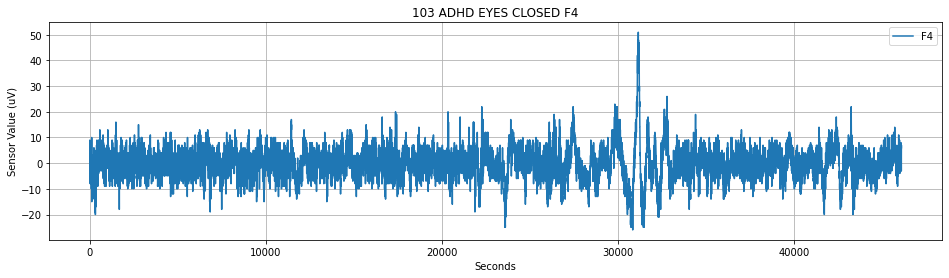

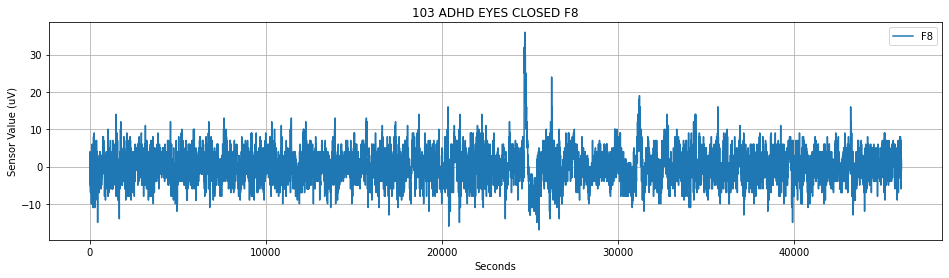

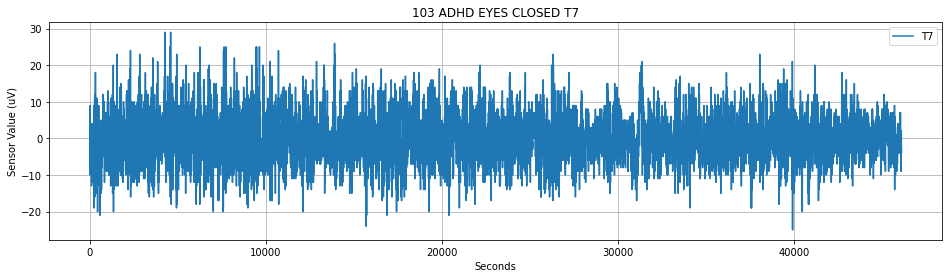

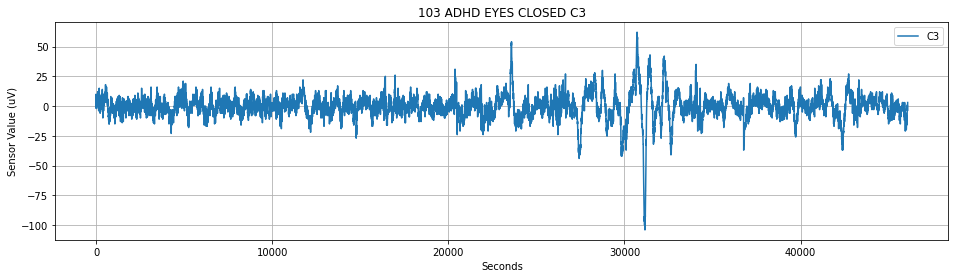

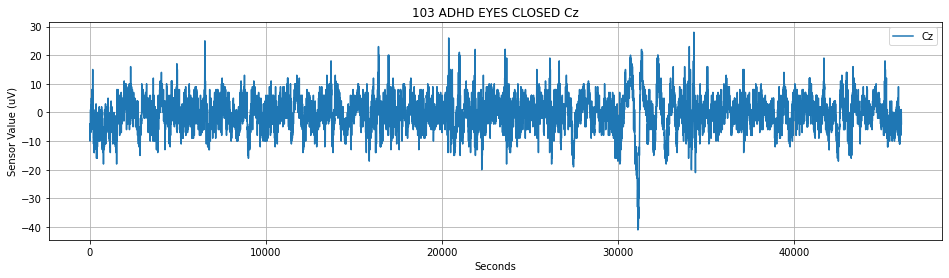

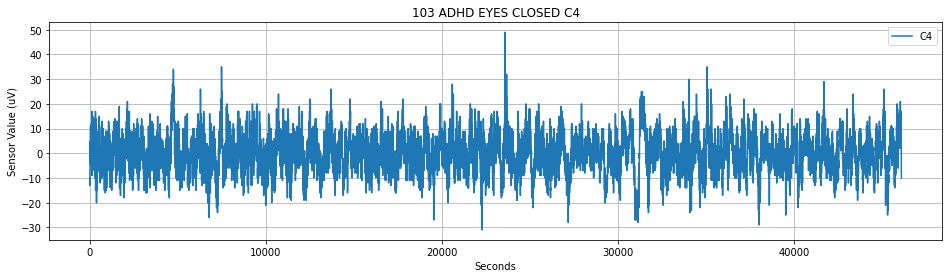

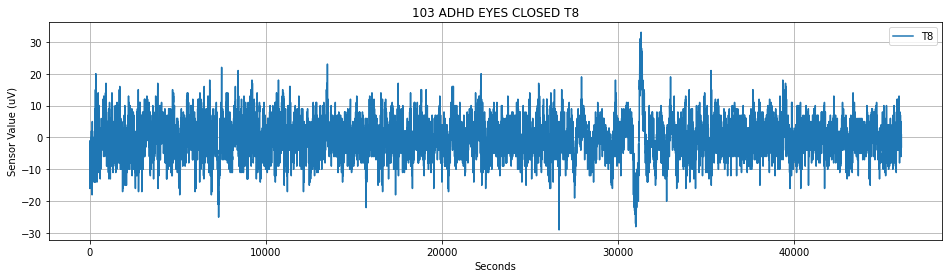

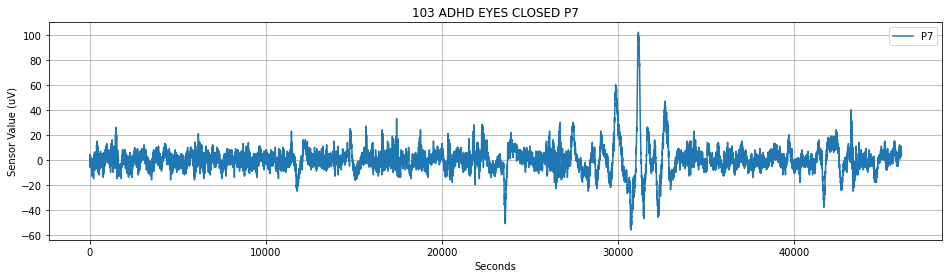

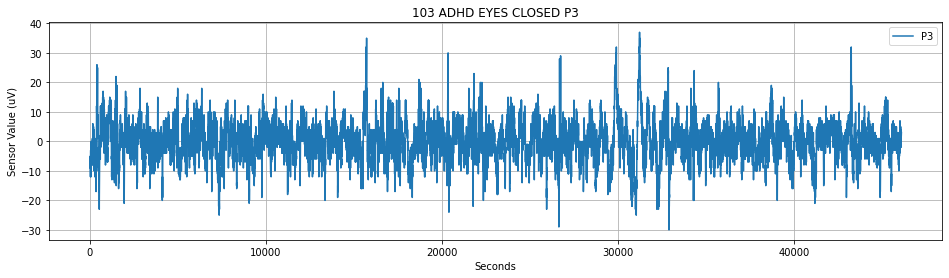

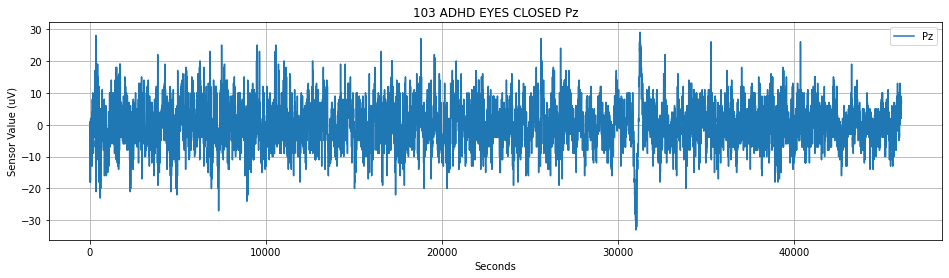

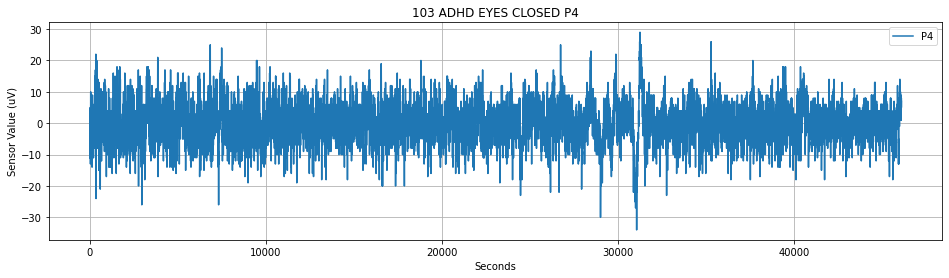

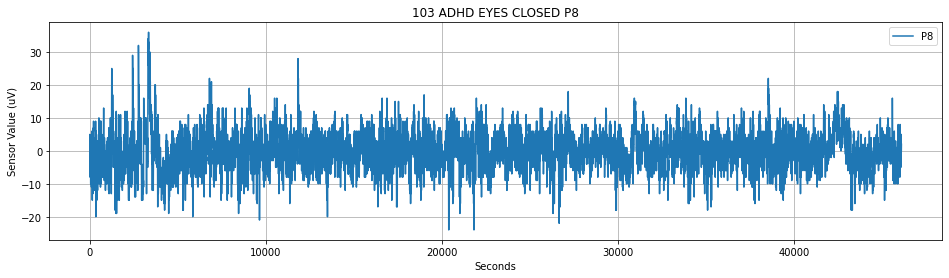

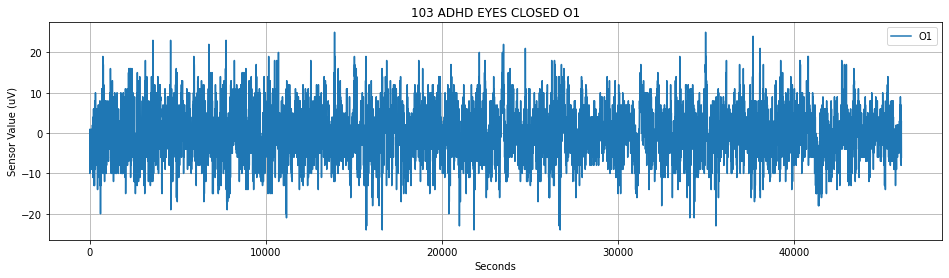

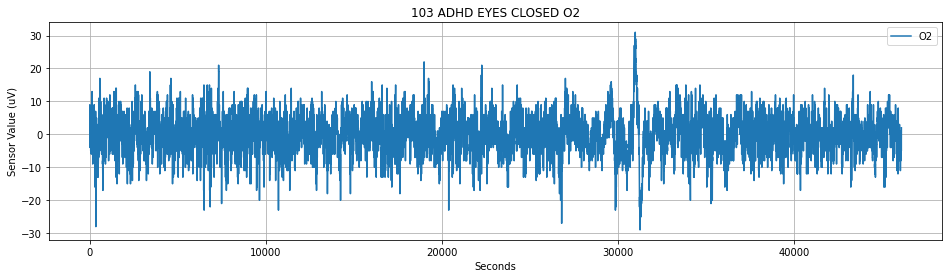

In [21]:
x=0
for channel_data in np.transpose(ec_adhd_103['EC_Data']):
    plt.figure(x, figsize=(16,4))
    plt.grid()
    plt.plot(np.transpose(ec_adhd_103['EC_Data'])[x])
    plt.legend([channels[x]])
    plt.title('103 ADHD EYES CLOSED '+ channels[x])
    plt.xlabel('Seconds')
    plt.ylabel('Sensor Value (uV)')
    x+=1

In [141]:
plt.close('all')

### 3D plot all channels

In [262]:
from mpl_toolkits import mplot3d

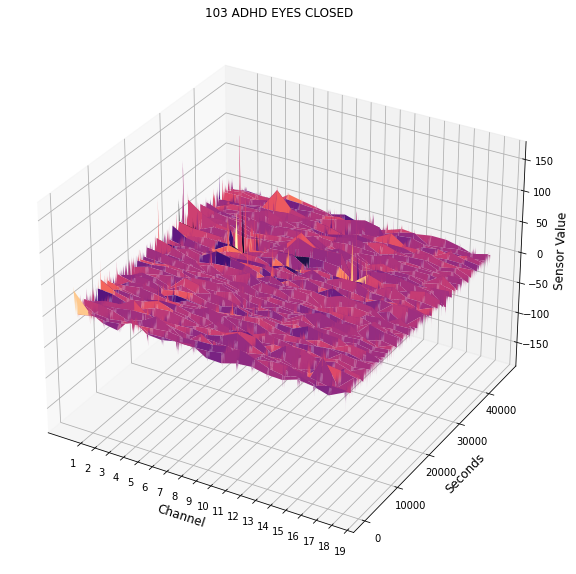

In [263]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

x = np.arange(19)
y = np.arange(256*180)
z = np.array(ec_adhd_103['EC_Data'])

xx, yy = np.meshgrid(x, y)

ax.plot_surface(xx, yy, z, cmap='magma')

ax.set_title('103 ADHD EYES CLOSED', size='large')
ax.set_xlabel('Channel', size='large')
ax.set_xticks(np.linspace(1, 19, num=19, endpoint=True))
ax.set_ylabel('Seconds', size='large')
ax.set_zlabel('Sensor Value', size='large')

plt.show()

## Creating Visualisation Functions
File name format: EC/EO_C/A_ID_RAW/ADJ<br>
eg: EC_A_103_RAW, eo_c_144_adj

In [237]:
def resolve_path(eyes, label, sid, stat):
    found = False
    
    if stat=='raw':
        if eyes=='ec':
            if label=='a':
                file_path = ec_adhd
            else: file_path = ec_cont
        else:
            if label=='a':
                file_path=eo_adhd
            else: file_path=eo_cont
            
    elif stat=='adj':
        if eyes=='ec':
            if label=='a':
                file_path = adj_ec_adhd
            else: file_path = adj_ec_cont
        else:
            if label=='a':
                file_path=adj_eo_adhd
            else: file_path=adj_eo_cont

    
    for f in os.listdir(file_path):
        if sid in f:
            file_path = os.path.join(file_path, f)
            found = True
            
    if found: return file_path
    else:
        print('FILE NOT FOUND')
    

In [242]:
def plot_all_in_one(file):
    eyes, label, sid, stat = file.lower().split('_')
    file = loadmat(resolve_path(eyes, label, sid, stat))
    
    plt.figure()
    plt.plot(file[eyes.upper()+'_Data'])
    plt.legend(channels, ncol=2, bbox_to_anchor=(1.0, 1.0))
    plt.title(sid+' '+eyes.upper()+' '+label.upper()+' '+stat.upper())
    plt.xlabel('Seconds')
    plt.ylabel('Sensor Value (uV)')
    

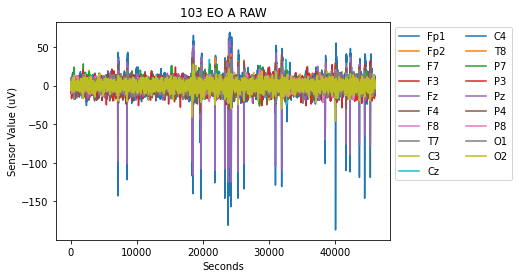

In [245]:
plot_all_in_one('eo_a_103_raw')

In [244]:
def plot_all_in_one_sep(file): #plot_eeg
    eyes, label, sid, stat = file.lower().split('_')
    file = loadmat(resolve_path(eyes, label, sid, stat))
    
    plt.figure(figsize=(20,10), dpi=80)
    x=0
    for data in np.transpose(file[eyes.upper()+'_Data']):
        #plt.plot(list(chain(range(-1000, 0),range(len(data)))), [x]*(len(data)+1000), color='black', alpha=0.5)
        plt.plot(range(len(data)), [data[i]+x for i in range(len(data))], linewidth=0.8)
        x+=60
    plt.yticks(np.linspace(0, 19*60, num=19, endpoint=False), channels, size='large')
    plt.xticks(np.linspace(0, 256*180, num=20, endpoint=True), size='large')
    plt.grid()
    plt.title(sid+' '+eyes.upper()+' '+label.upper()+' '+stat.upper(), size='large')
    plt.legend(channels, ncol=1, bbox_to_anchor=(1.0, 1.0))
    plt.xlabel('Seconds', size='large')
    plt.ylabel('Channel', size='large')
    
    

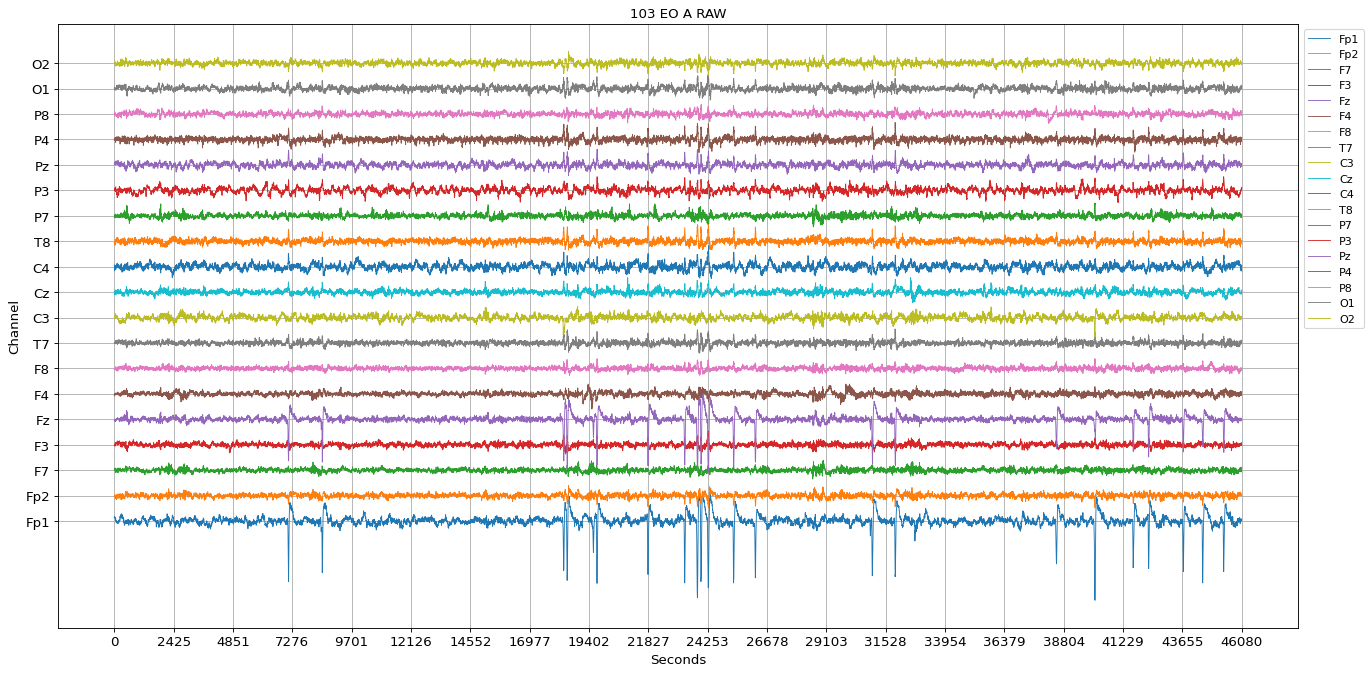

In [247]:
plot_all_in_one_sep('eo_a_103_raw')

In [250]:
def channel_name_to_num(name):
    for i in range(len(channels)):
        if channels[i].lower()==name.lower():
            n=i
    return n

In [265]:
# pass channel number or name too
def plot_single_channel(file, num=0, name=''):
    if num==0 and name=='':
        print('NO CHANNEL PASSED')
        return
    
    eyes, label, sid, stat = file.lower().split('_')
    file = loadmat(resolve_path(eyes, label, sid, stat))
    
    if num==0:
        n=channel_name_to_num(name)
    else: n=num-1 # cuz channel idx 0 = 1st channel
    
    plt.plot(np.transpose(file[eyes.upper()+'_Data'])[n])
    plt.legend([channels[n]])
    plt.title(sid+' '+eyes.upper()+' '+label.upper()+' '+stat.upper()+' '+ channels[n], size='large')
    plt.xlabel('Seconds')
    plt.ylabel('Sensor Value (uV)')
    

0


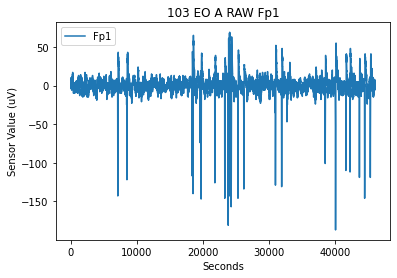

In [255]:
plot_single_channel('eo_a_103_raw', name='fp1')

In [256]:
def plot_all_single_channels(file):
    eyes, label, sid, stat = file.lower().split('_')
    file = loadmat(resolve_path(eyes, label, sid, stat))
    
    trans = np.transpose(file[eyes.upper()+'_Data'])
    x=0
    for channel_data in trans:
        plt.figure(x)
        plt.plot(trans[x])
        plt.legend([channels[x]])
        plt.title(sid+' '+eyes.upper()+' '+label.upper()+' '+stat.upper()+' '+ channels[x], size='large')
        plt.xlabel('Seconds')
        plt.ylabel('Sensor Value (uV)')
        x+=1
    

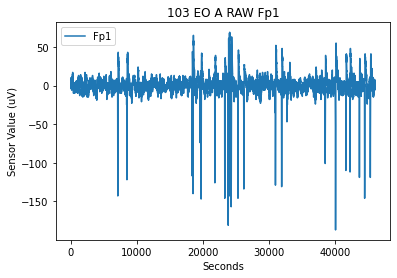

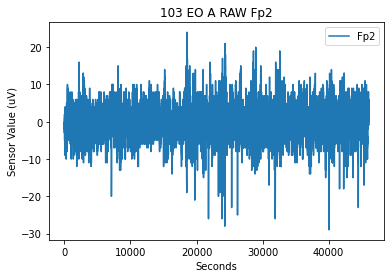

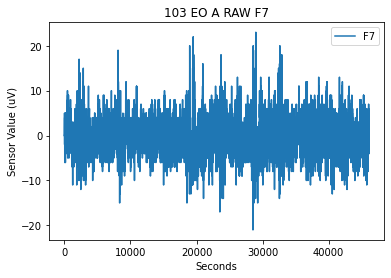

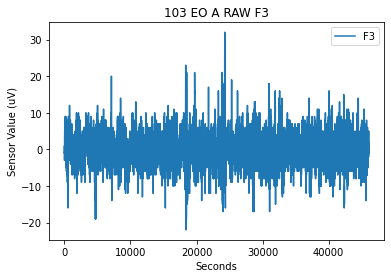

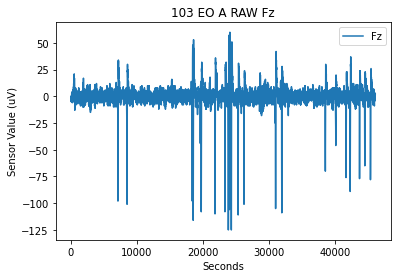

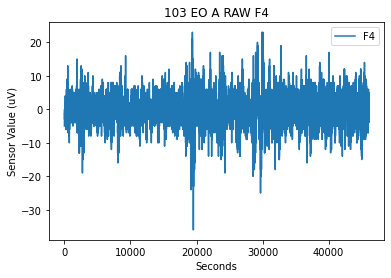

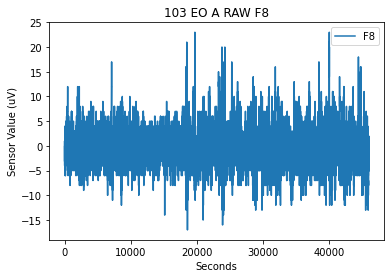

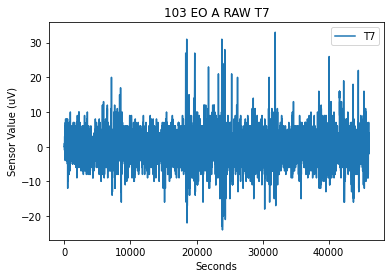

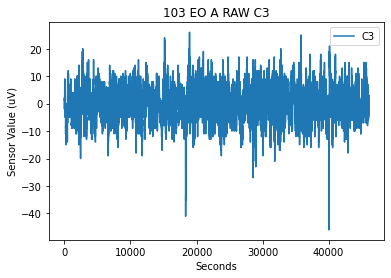

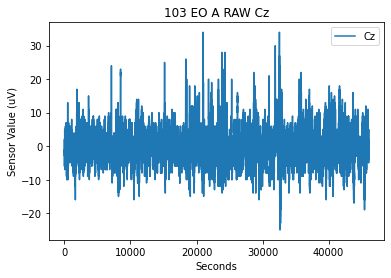

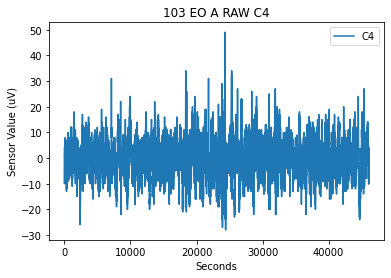

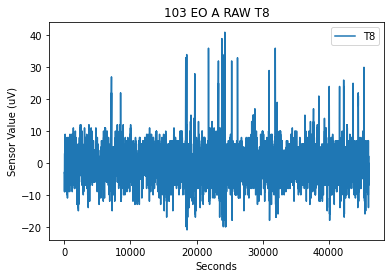

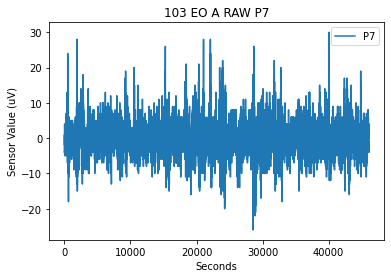

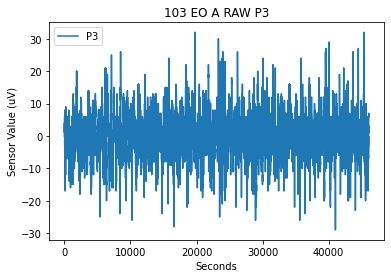

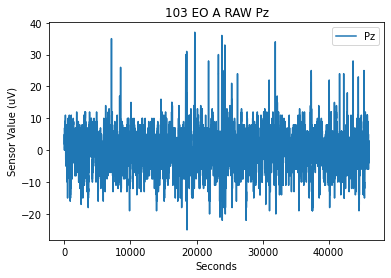

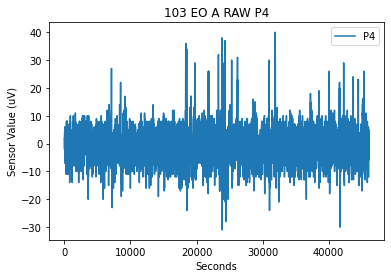

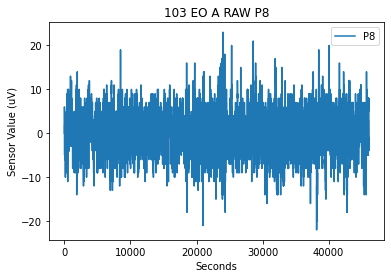

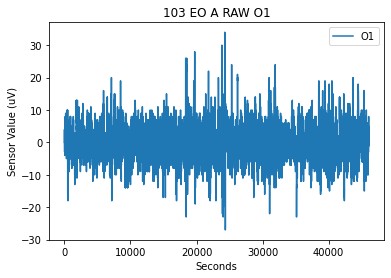

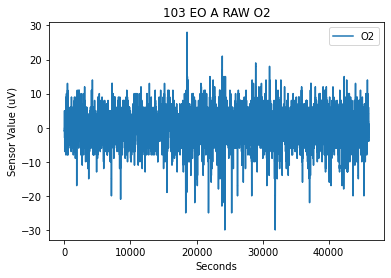

In [257]:
plot_all_single_channels('eo_a_103_raw')

In [260]:
# optional cmap argument
def plot_3d(file,cm='magma'):
    eyes, label, sid, stat = file.lower().split('_')
    file = loadmat(resolve_path(eyes, label, sid, stat))
    
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')

    x = np.arange(19)
    y = np.arange(256*180)
    z = np.array(file[eyes.upper()+'_Data'])

    xx, yy = np.meshgrid(x, y)

    ax.plot_surface(xx, yy, z, cmap=cm)

    ax.set_title(sid+' '+eyes.upper()+' '+label.upper()+' '+stat.upper(), size='large')
    ax.set_xlabel('Channel', size='large')
    ax.set_xticks(np.linspace(1, 19, num=19, endpoint=True))
    ax.set_ylabel('Seconds', size='large')
    ax.set_zlabel('Sensor Value', size='large')

    plt.show()

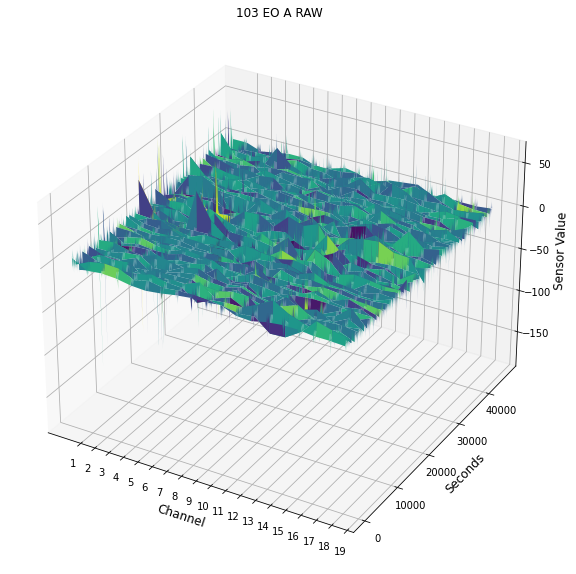

In [264]:
plot_3d('eo_a_103_raw', 'viridis')

In [22]:
import eeg_tools as et

In [24]:
et.toolkit_help()

REQUIRED FILE NAME FORMAT: [ EC/EO ]_[ C/A ]_[ ID ]_[ RAW/ADJ ]	 eg: EC_A_103_RAW, eo_c_144_adj
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
FUNC: toolkit_help()
ARGS: none
USE: Display available functions and their uses and the file format reqd.
----------------------------------------------------------------------------------------------------
FUNC: plot_all_in_one(file)
ARGS: file name in reqd. format
USE: plot all channel data in one graph, every channel centered at x-axis
----------------------------------------------------------------------------------------------------
FUNC: plot_eeg(file)
ARGS: file name in reqd. format
USE: plot all channel data in one graph, seperated: main eeg-like plot
----------------------------------------------------------------------------------------------------
FUNC: plot_single_channel(file, num

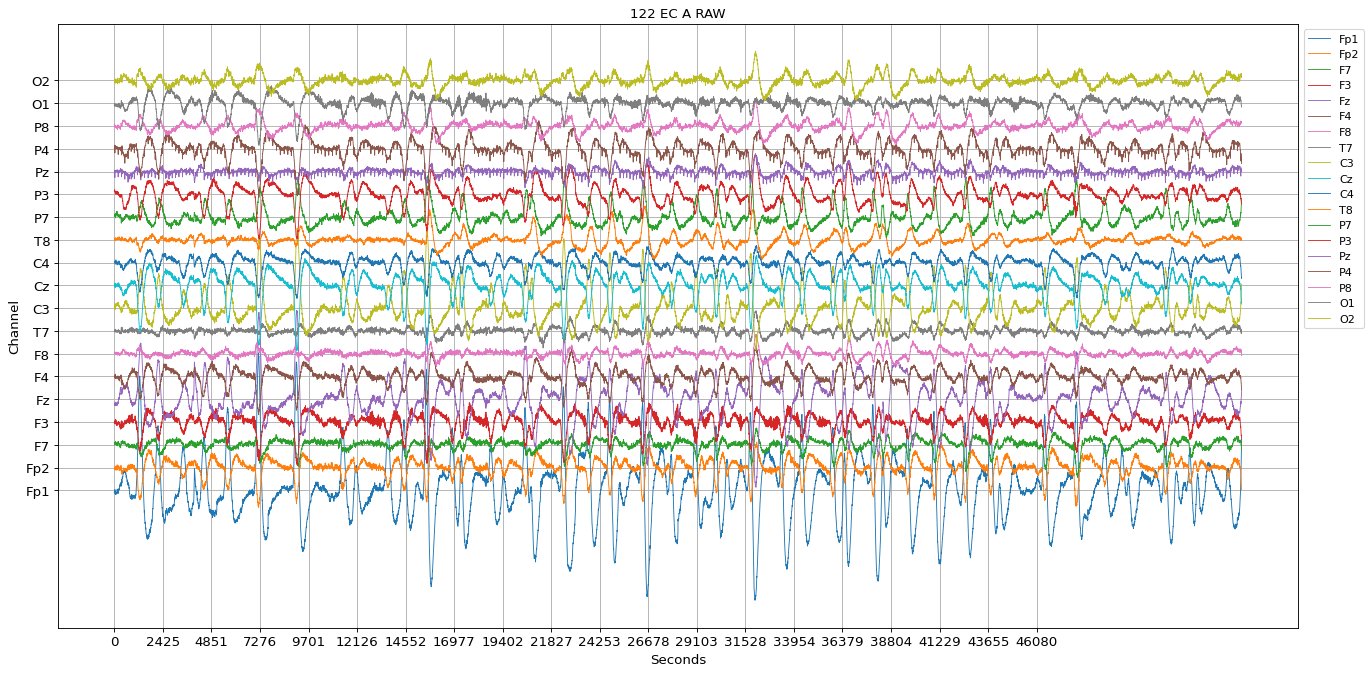

In [26]:
et.plot_eeg('ec_a_122_raw')

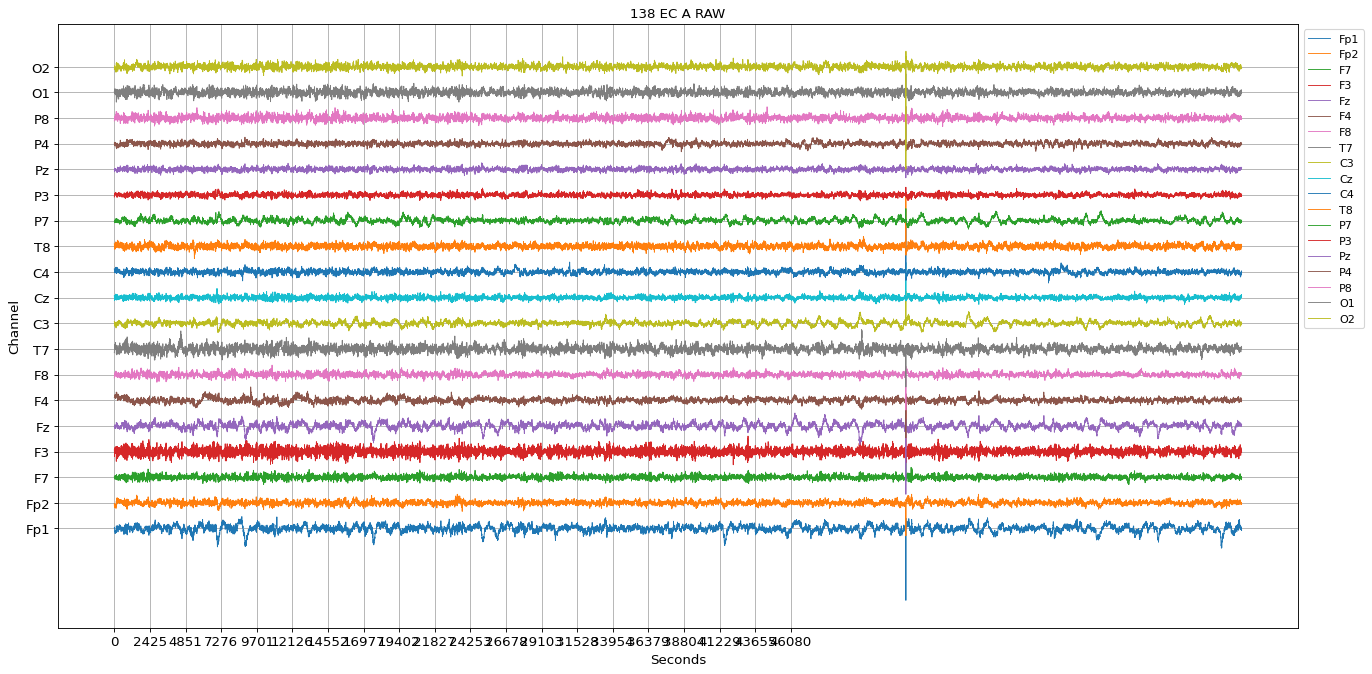

In [27]:
et.plot_eeg('ec_a_138_raw')